# Exploratory Data Analysis

The goal is to dig into data to see how the metrics are relating to each other and also identify possible transformation for preprocessing. 

Questions to answer:
- [x] What is the proportion of medical desert in France?
- [x] Is there any area with an over-density of doctors?
- [x] What factors would impact the lack of doctors in an area?
- [ ] Can an area improve the situation by playing on these factors?
- [ ] What could be the solution to improve the situation of medical desert?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

pd.set_option('max_columns',50)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv('../data/medical_desert_clean.csv', dtype={'CODGEO':'str','Communes':'str'})
print('Shape:',df.shape)
df.head(10)

Shape: (34989, 26)


,CODGEO,Communes,APL,P16_POP,median_living_standard,healthcare_education_establishments,density_area,annual_pop_growth,unemployment_rate,secondary_residence_rate,vacant_residence_rate,active_local_business_rate,city_social_amenities_rate,0_14_pop_rate,15_59_pop_rate,60+_pop_rate,mobility_rate,average_birth_rate,CSP1_rate,CSP2_rate,CSP3_rate,CSP4_rate,CSP5_rate,CSP6_rate,CSP7_rate,CSP8_rate
0,01001,L'Abergement-Clémenciat,2.396,767,22679.000000,0,48.087774,-0.335578,7.127430,4.597701,7.471264,48.000000,14.000000,20.990874,55.149935,23.859192,2.216428,1.060116,2.479339,3.305785,12.396694,15.702479,16.528926,20.661157,23.966942,4.958678
1,01002,L'Abergement-de-Varey,2.721,243,24382.083333,0,26.557377,0.757662,6.944444,30.769231,9.467456,57.894737,15.789474,22.633745,55.555556,21.810700,2.057613,1.761006,0.000000,10.256410,7.692308,12.820513,20.512821,5.128205,33.333333,10.256410
2,01004,Ambérieu-en-Bugey,4.335,14081,19721.000000,0,572.398374,0.347315,12.038385,1.684887,9.223702,67.838444,17.950636,19.823130,57.904337,22.272533,1.516341,1.595989,0.024879,2.662394,6.939410,17.209926,16.240671,15.940930,24.740051,16.241738
3,01005,Ambérieux-en-Dombes,4.279,1671,23378.000000,0,104.962312,0.872154,6.348660,1.810755,4.979578,55.319149,10.638298,20.521782,58.339888,21.138330,0.985957,1.235096,0.378011,4.511481,7.896554,17.271010,18.019503,17.254154,23.429304,11.239984
4,01006,Ambléon,0.912,110,21660.000000,0,18.707483,-0.359722,11.111111,16.216216,12.162162,71.428571,28.571429,10.909091,54.545455,34.545455,2.727273,1.621622,0.000000,0.000000,5.555556,27.777778,16.666667,16.666667,27.777778,5.555556
5,01007,Ambronay,4.755,2684,22146.451613,0,80.000000,2.562896,6.691510,4.825814,6.549319,57.653061,13.265306,22.443482,56.765383,20.791135,1.361672,1.291345,1.496600,3.244761,9.733525,17.920917,17.722676,15.425971,23.474497,10.981053
6,01008,Ambutrix,4.216,750,24893.809524,0,143.678161,0.432215,5.232558,1.586013,6.872722,63.333333,16.666667,18.145695,62.251656,19.602649,0.264901,1.482480,0.000000,2.419355,8.064516,23.387097,16.129032,19.354839,21.774194,8.870968
7,01009,Andert-et-Condon,4.164,336,23088.000000,0,48.414986,-0.177621,8.241758,10.580666,9.698944,67.567568,10.810811,16.358025,50.000000,33.641975,0.617284,0.592593,0.000000,9.090909,1.818182,27.272727,14.545455,9.090909,27.272727,10.909091
8,01010,Anglefort,2.183,1124,22880.555556,0,38.414217,1.742295,7.726597,13.936624,8.755059,48.275862,10.344828,23.766816,56.143498,20.089686,0.807175,1.058005,2.923977,4.093567,5.263158,12.280702,20.467836,22.222222,20.467836,12.280702
9,01011,Apremont,1.519,383,23246.086957,0,26.286891,0.476717,7.589286,11.308490,8.615992,55.263158,13.157895,23.138298,52.127660,24.734043,1.329787,1.109643,1.724138,1.724138,12.068966,20.689655,6.896552,8.620690,39.655172,8.620690


In [4]:
df.describe()

,APL,P16_POP,median_living_standard,healthcare_education_establishments,density_area,annual_pop_growth,unemployment_rate,secondary_residence_rate,vacant_residence_rate,active_local_business_rate,city_social_amenities_rate,0_14_pop_rate,15_59_pop_rate,60+_pop_rate,mobility_rate,average_birth_rate,CSP1_rate,CSP2_rate,CSP3_rate,CSP4_rate,CSP5_rate,CSP6_rate,CSP7_rate,CSP8_rate
count,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,3.498900e+04,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000
mean,3.156094,1896.643459,20773.053134,0.029724,182.073483,0.300595,8.271189,13.305151,8.528824,45.746942,13.065318,17.863788,53.533741,28.602467,1.017086e+00,1.024332,3.328085,4.299023,5.697024,13.220805,15.407682,14.765427,30.996735,12.265213
std,1.273401,8560.155185,2894.465100,0.396736,981.656545,1.743309,3.616850,15.284405,4.608338,15.904740,7.585260,4.587282,5.816198,8.673142,6.750170e-01,0.406039,5.275842,3.737338,5.090049,6.598653,6.219868,7.295628,11.051101,6.150436
min,0.000000,1.000000,10932.000000,0.000000,0.025880,-18.938692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.714286,0.000000,-8.575516e-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.368000,199.000000,18985.000000,0.000000,18.598383,-0.637446,5.960265,2.713458,5.311381,35.714286,8.247423,15.151515,50.289017,22.556391,6.237116e-01,0.775623,0.000000,2.069499,2.319572,8.985507,12.110865,10.000000,23.883807,8.823529
50%,3.102000,457.000000,20323.190476,0.000000,40.712074,0.228835,7.797538,7.581322,7.764177,47.058824,11.764706,18.098898,54.166667,27.298304,9.803922e-01,1.010830,1.388889,3.755604,4.761905,13.084112,15.535406,14.285714,29.892645,11.956522
75%,3.885000,1158.000000,22010.833333,0.000000,96.577947,1.195559,10.084034,18.090330,11.025422,57.142857,16.315789,20.822222,57.347204,33.474021,1.339655e+00,1.253980,4.347826,5.807195,7.954545,17.202769,18.744535,18.859705,37.037037,15.183981
max,34.547000,475438.000000,48288.095238,28.000000,40059.128065,38.520495,52.156102,96.879433,53.505535,100.000000,100.000000,51.642990,100.000000,89.285714,1.250000e+01,4.705882,100.000000,100.000000,100.000000,66.666667,100.000000,83.333333,100.000000,100.000000


- We can see different sale of data for **median_living_standard, density_area**, so we may want to apply scaling transformation, knowing that we have a lot of rate data for other features. 
- The **mobility_rate** columns have also many deviation between the min and the max. Don't know if it really relavant.
- We can see outliers in the many columns especially for density_area. 
- We have more than 75% of city having no **healthcare education establishements** (it represents only 524 cities) so maybe the column won't be so relevant. 

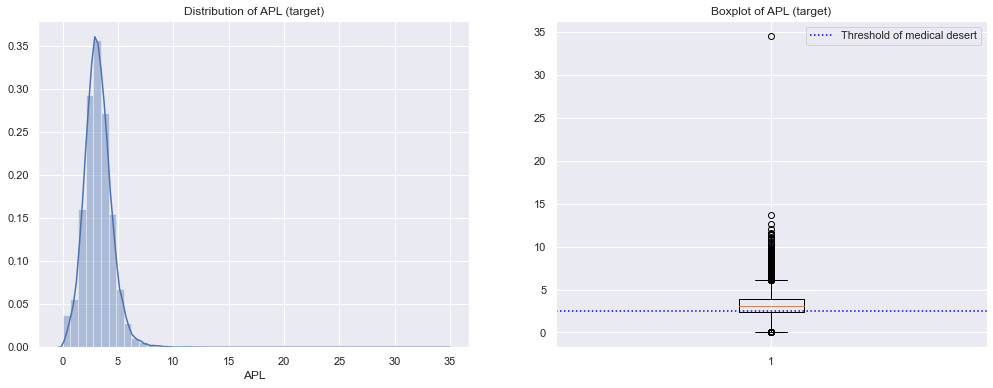

In [5]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(17,6))

sns.distplot(df.APL, ax=ax1)
ax1.set_title('Distribution of APL (target)')


ax2.boxplot(df.APL)
xmin, xmax = ax2.get_xlim()
ax2.hlines(2.5,xmin=xmin,xmax=xmax, colors='blue', linestyle='dotted',label='Threshold of medical desert')
ax2.set_title('Boxplot of APL (target)')

plt.savefig('../img/target_exploratory.png', bbox_inches='tight')
plt.legend()
plt.show()

In [14]:
print("Part of population under threshold",round((df[df.APL<2.5].P16_POP.sum()/df.P16_POP.sum())*100,2),"%")
print("which represent",df[df.APL<2.5].P16_POP.sum(),"of people")

Part of population under threshold 11.07 %
which represent 7345214 of people


The target is almost perfectly normally distributed. It is slightly right-skewed because of outliers with city having really high APL indicator. 

We can conclude that there is inequality with some city having 0 as indicator of APL (residents have potentially 0/consultation/year around 20min drive) and many city have huge indicator so we can assume there are area with an over-density of doctors.

In [23]:
df.dtypes

CODGEO                                  object
Communes                                object
APL                                    float64
P16_POP                                  int64
median_living_standard                 float64
healthcare_education_establishments      int64
density_area                           float64
annual_pop_growth                      float64
unemployment_rate                      float64
secondary_residence_rate               float64
vacant_residence_rate                  float64
active_local_business_rate             float64
city_social_amenities_rate             float64
0_14_pop_rate                          float64
15_59_pop_rate                         float64
60+_pop_rate                           float64
mobility_rate                          float64
average_birth_rate                     float64
CSP1_rate                              float64
CSP2_rate                              float64
CSP3_rate                              float64
CSP4_rate    

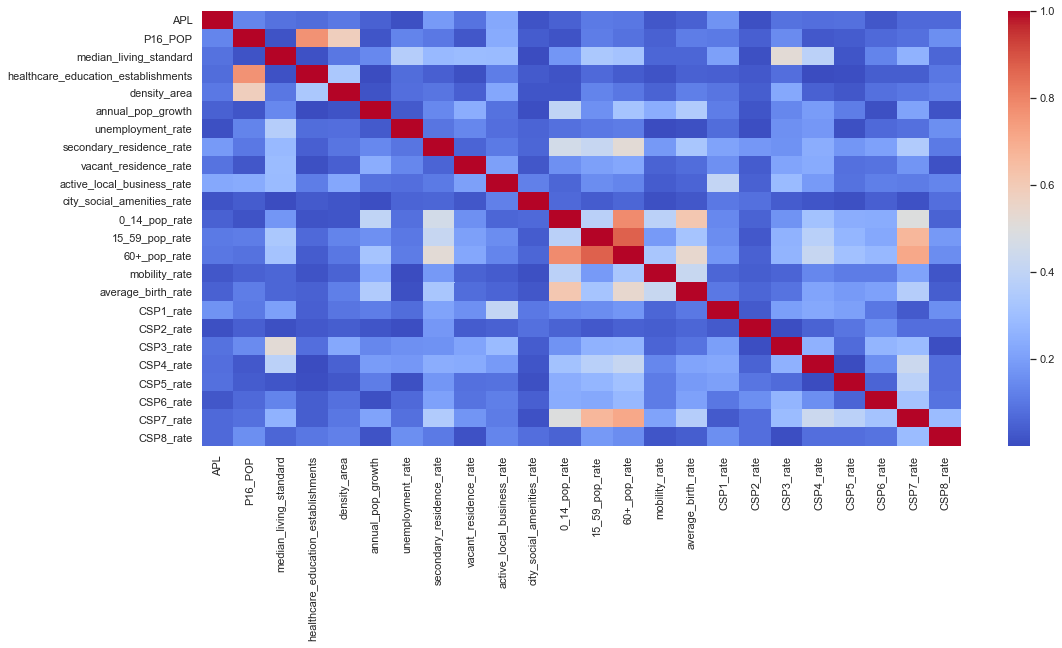

In [35]:
plt.figure(figsize=(17,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm')
plt.show()

- There is a correlation between P16_POP and density_area or healthcare_education_establishments but it's okay because we won't use the P16_POP feature for modelling.

- We can see that the proportion of population by age are correlated which seems relevant and maybe it is not necessary to keep the 3 columns for modelling, maybe we can drop the 60_pop_rate because it is correlated to the 2 other proportion.

- There is a small correlation between 60_pop_rate, 15_59_pop_rate and CSP7_rate. 

- Otherwise the majority of features choosen to predict APL are independant between each of them. Also we can see our target is not correlated to any of the features. Does that mean we have no dependency between our target and the features? In this case, our model won't work well. 

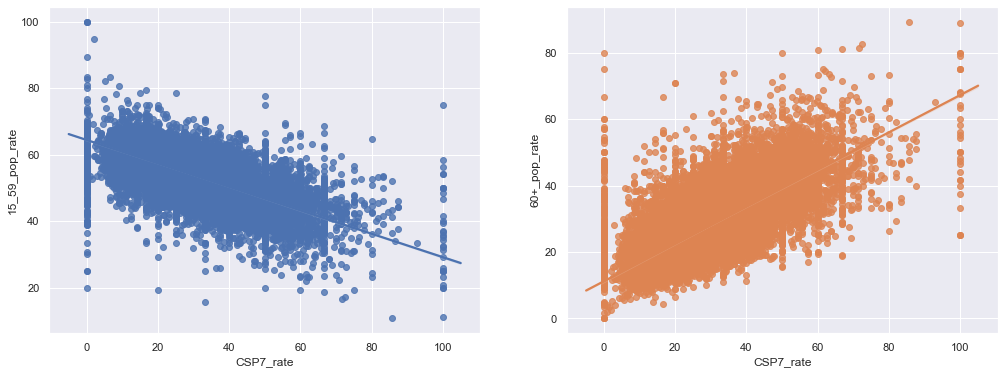

In [52]:
# Checking correlation between CSP7_rate and 15_60 population proportion to understand the relationship
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(17,6))

sns.regplot(x=df.CSP7_rate,y=df['15_59_pop_rate'], ax=ax1)
sns.regplot(x=df.CSP7_rate,y=df['60+_pop_rate'], ax=ax2)
plt.show()

The less propotion of 15-59 year old people and the more they are a proportion of 60+ year old people, the more there is CSP7_rate. This is normal because CSP7 is the category of retired people. 

So we can drop the row of 60_pop_rate for sure because we would get the data in this column. 

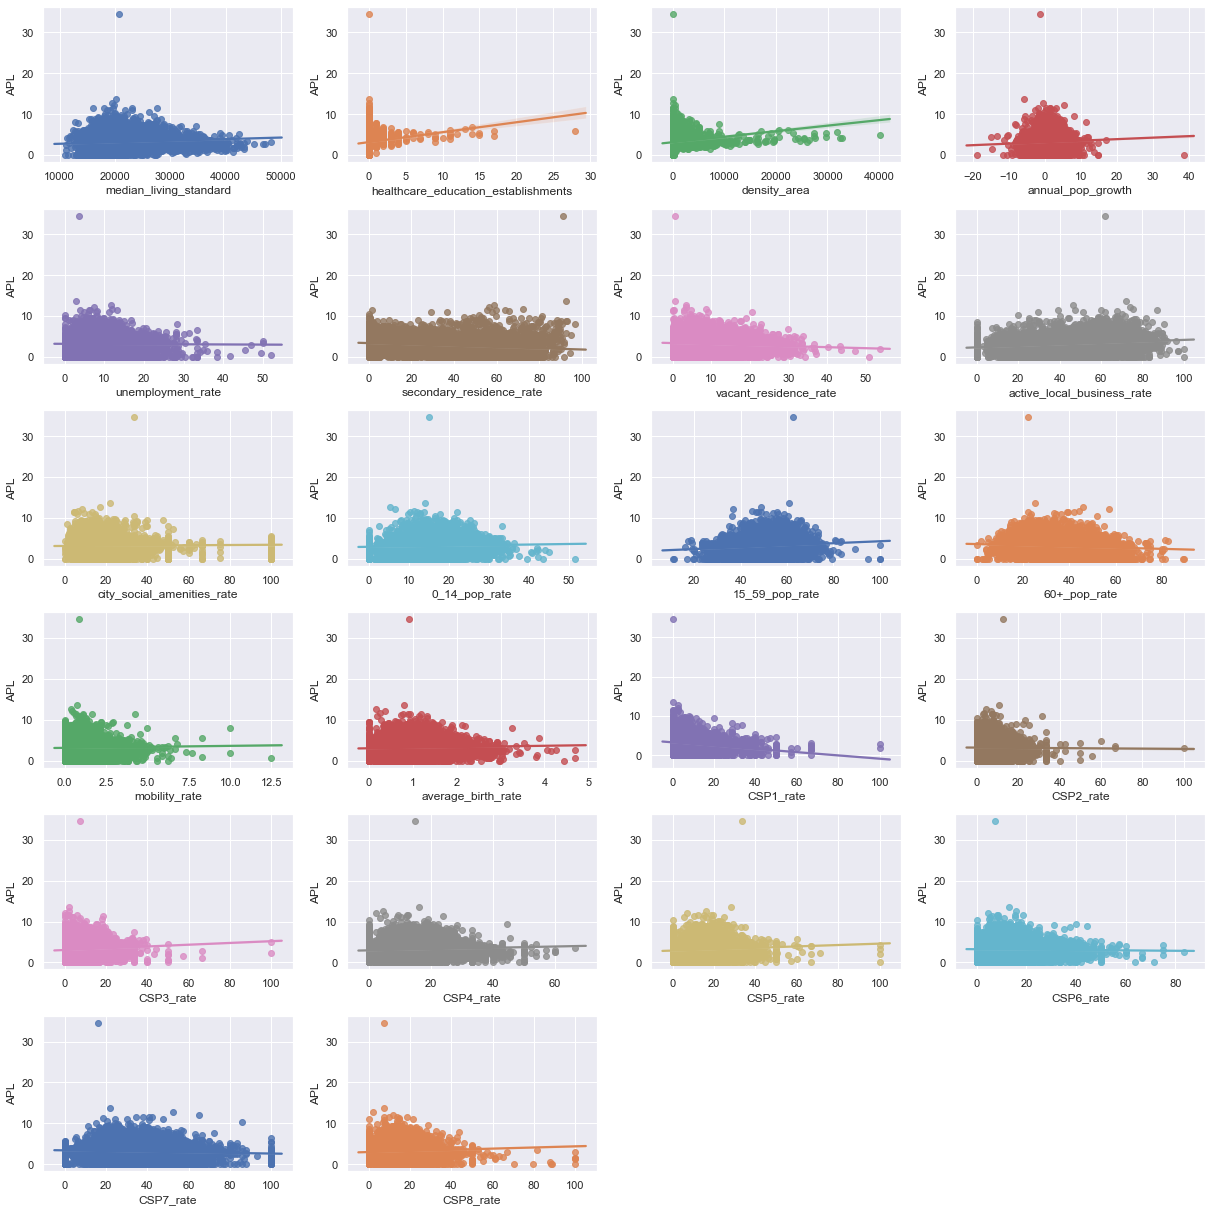

In [61]:
# Checking the relationship between the target and the features
fig, axs=plt.subplots(6,4, figsize=(17,17))

for i in range(cols.shape[0]):
    ax=axs[i//4,i%4]
    sns.regplot(x=df[cols[i]],y=df.APL,ax=ax)

fig.delaxes(axs[5,2])
fig.delaxes(axs[5,3])
fig.tight_layout()
plt.show()

We can't see a true linear relationship between our target (APL) and the features except for heathlcare_education_establishements and density_area. 

So we may say that heathlcare_education_establishements and density_area could have a direct impact on the medical_desert. Let's see if the modelling part confirm that.

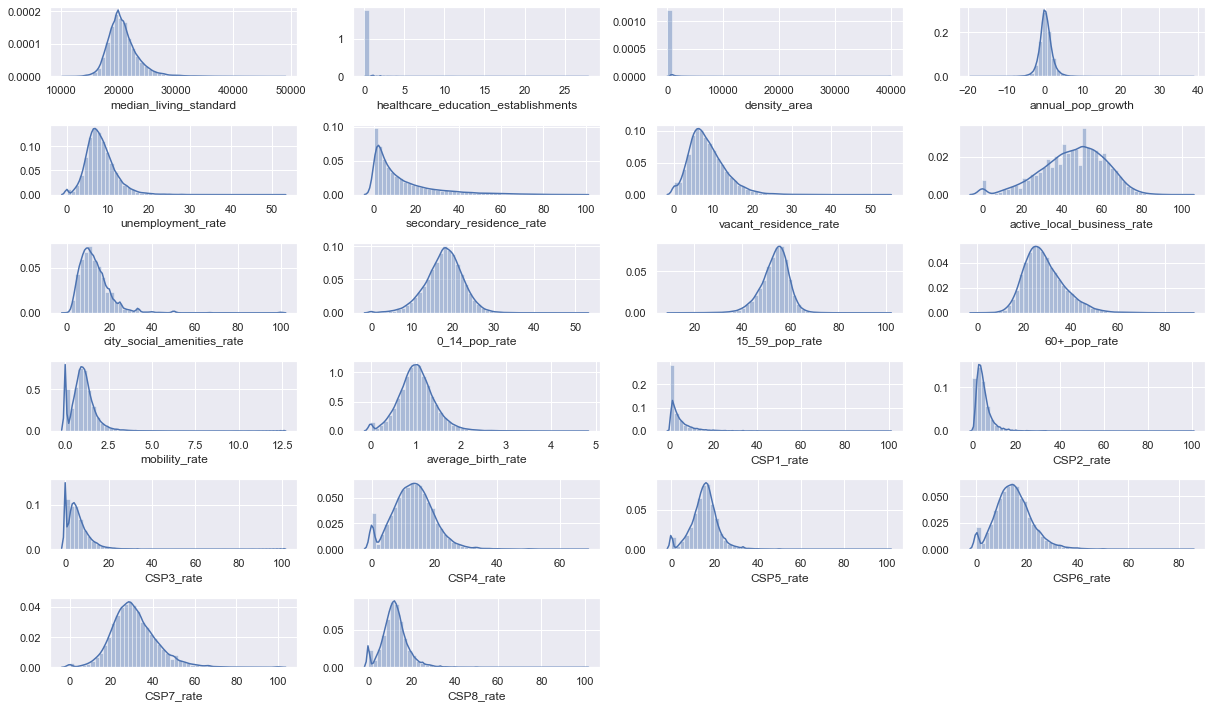

In [60]:
# Checking the distribution of the features
fig, axs=plt.subplots(6,4, figsize=(17,10))

for i in range(cols.shape[0]):
    ax=axs[i//4,i%4]
    sns.distplot(df[cols[i]],ax=ax)

fig.delaxes(axs[5,2])
fig.delaxes(axs[5,3])
fig.tight_layout()
plt.show()

- Many features data are kinda normally distributed, which is good if we want to go for regression modelling.

- We can see bimodal distribution in some CSP_rate features, also for mobility_rate. 

- Also, some of distribution are right-skewed such as CSP1 and CPS2 rate, secondary_residence_rate. 

- Finally, we can see that heathlcare_education_establishements and density_area have sparse data so there must have many outliers.